Chapter 16 Notes


In [ ]:
# Precision vs Recall in Confusion Matrices
# Precsion: "if I say yes, am I right": Vertical
# Recall: "How many did I find": Horizontal

# Sensitivity: same as recall
# specificity: recall of the other class

# ROC AUC
# ROC: Graphs Specificity over Sensitivity
# Interesting in the area underneath the curve = (AUC)

# F1 Score: 2*(precision * recall) / (precision + recall)

# Accuracy, ROC AUC, F1 Score
# What's the interpretation of ROC AUC and the F1 Score


In [76]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict


# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [45]:
import palmerpenguins as pp
pen = pp.load_penguins()

pen = pen.dropna()
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [77]:
X = pen.drop(["species"], axis = 1)
y = pen["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y)


Training accuracy is 1

In [52]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include = object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

#KNN 5
knn_5_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn5",  KNeighborsClassifier(n_neighbors=5))]
).set_output(transform = "pandas")

In [79]:
knn_5_pipeline.fit(X_train, y_train)
y_pred = cross_val_predict(knn_5_pipeline, X, y, cv=5)

cm = confusion_matrix(y, y_pred)
cm

array([[144,   2,   0],
       [  0,  68,   0],
       [  0,   0, 119]])

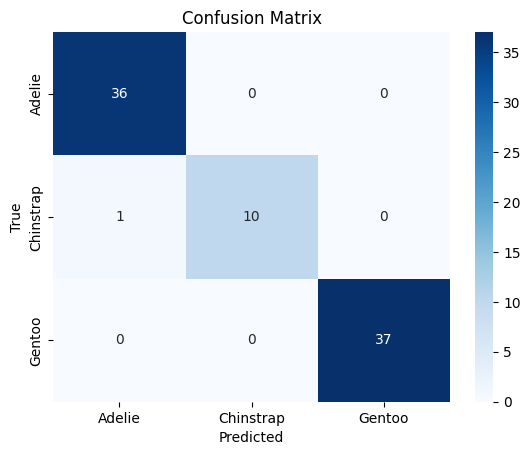

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

knn_5_pipeline.fit(X_train, y_train)
y_pred = knn_5_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

#get labels from the data (ie species)
class_labels = np.unique(y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [83]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9880952380952381

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        36
   Chinstrap       1.00      0.91      0.95        11
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99        84
   macro avg       0.99      0.97      0.98        84
weighted avg       0.99      0.99      0.99        84



In [90]:
#KNN 10
knn_10_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn10",  KNeighborsClassifier(n_neighbors=10))]
).set_output(transform = "pandas")

knn_10_pipeline.fit(X_train, y_train)
y_pred2 = cross_val_predict(knn_10_pipeline, X, y, cv=5)

cm2 = confusion_matrix(y, y_pred2)
cm2

array([[145,   1,   0],
       [  2,  66,   0],
       [  0,   0, 119]])

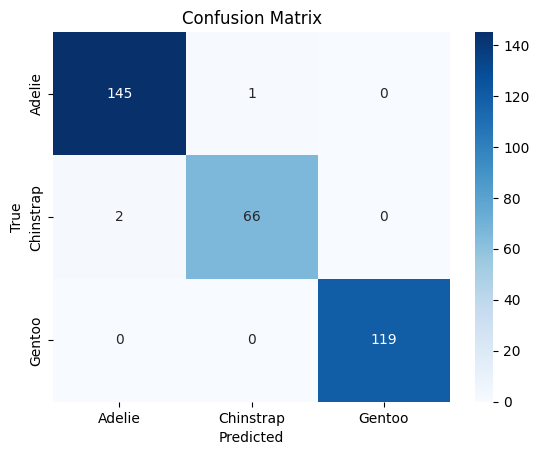

In [91]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [93]:
accuracy2 = accuracy_score(y, y_pred2)
print(accuracy2)
print(classification_report(y, y_pred2))

0.990990990990991
              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



In [96]:
#Dtree 1
dtree_1_pipeline = Pipeline(
  [("preprocessing", ct),
  ("dtree1",  DecisionTreeClassifier(max_depth=5))]
).set_output(transform = "pandas")

dtree_1_pipeline.fit(X_train, y_train)
y_pred3 = cross_val_predict(dtree_1_pipeline, X, y, cv=5)

cm3 = confusion_matrix(y, y_pred3)
cm3

array([[141,   3,   2],
       [  2,  66,   0],
       [  2,   0, 117]])

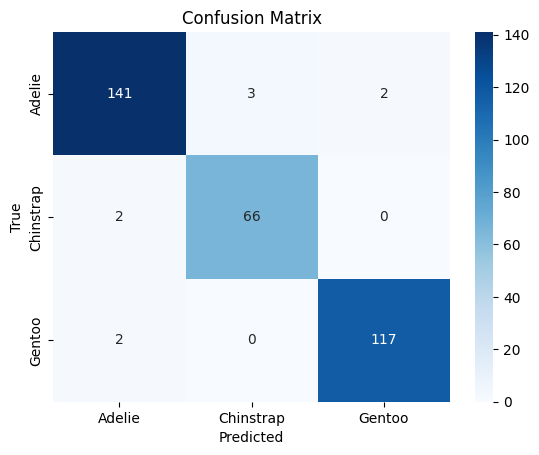

In [97]:
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [98]:
accuracy3 = accuracy_score(y, y_pred3)
print(accuracy3)
print(classification_report(y, y_pred3))

0.972972972972973
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97       146
   Chinstrap       0.96      0.97      0.96        68
      Gentoo       0.98      0.98      0.98       119

    accuracy                           0.97       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



In [102]:
#Dtree 2
dtree_2_pipeline = Pipeline(
  [("preprocessing", ct),
  ("dtree2",  DecisionTreeClassifier(max_depth=10))]
).set_output(transform  = "pandas")

dtree_2_pipeline.fit(X_train, y_train)
y_pred4 = cross_val_predict(dtree_2_pipeline, X, y, cv=5)

cm4 = confusion_matrix(y, y_pred4)
cm4

array([[143,   2,   1],
       [  3,  65,   0],
       [  1,   0, 118]])

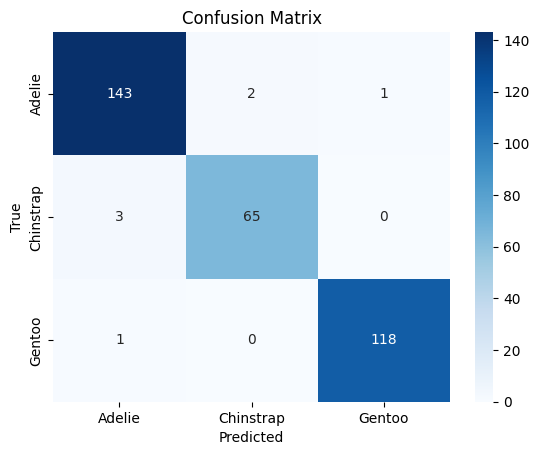

In [104]:
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [105]:
accuracy4 = accuracy_score(y, y_pred4)
print(accuracy4)
print(classification_report(y, y_pred4))

0.978978978978979
              precision    recall  f1-score   support

      Adelie       0.97      0.98      0.98       146
   Chinstrap       0.97      0.96      0.96        68
      Gentoo       0.99      0.99      0.99       119

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333

